In [175]:
import pandas as pd
import pandas as pd
import string
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

C:\Users\7MAKSACOD PC\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [145]:
names=pd.read_csv(f"/Users/7MAKSACOD PC/Downloads/names_data.csv")

In [146]:
names.head()

,name,gender,num_names
0,Mary,F,5644
1,Annie,F,4034
2,Anna,F,5615
3,Margaret,F,5558
4,Helen,F,4914


In [147]:
alphabet=list(string.ascii_lowercase)

In [148]:
names["name"]=names["name"].str.lower()
data=names.iloc[:, :2]

## Binary encoder function

def encod_sex(ch):
  if ch=="F":
    return 0
## 0 mean female and 1 for male
  else:
    return 1

data["gender"]= data["gender"].apply(encod_sex)

In [149]:
data.head()

,name,gender
0,mary,0
1,annie,0
2,anna,0
3,margaret,0
4,helen,0


In [150]:
def encod_names(name):
    name_split=list(name)
    name_encoded=[alphabet.index(name_split[i])+1 for i in range(len(name_split))]
    return name_encoded

data["name_encoded"]=data["name"].apply(encod_names)

In [151]:
data.head()

,name,gender,name_encoded
0,mary,0,"[13, 1, 18, 25]"
1,annie,0,"[1, 14, 14, 9, 5]"
2,anna,0,"[1, 14, 14, 1]"
3,margaret,0,"[13, 1, 18, 7, 1, 18, 5, 20]"
4,helen,0,"[8, 5, 12, 5, 14]"


In [152]:
def comp_list(x):
    if len(x)< 50:
        x=[0]*(50-len(x))+x
    return x

In [153]:
data["name_encoded"]=data["name_encoded"].apply(comp_list)

In [154]:
data.head()

,name,gender,name_encoded
0,mary,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,annie,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,anna,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,margaret,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,helen,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [155]:
def lstm_model(num_alphabets=27, name_length=50, embedding_dim=256):
    model = Sequential([
        Embedding(num_alphabets, embedding_dim, input_length=name_length),
        Bidirectional(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2)),
        Dense(1, activation="sigmoid")
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Step 1: Instantiate the model
model = lstm_model(num_alphabets=27, name_length=50, embedding_dim=256)

In [156]:
X =np.array(data["name_encoded"].tolist())
y = data['gender'].values

In [157]:
X=np.array(data["name_encoded"].tolist())

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
callbacks =[ EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1)]
history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)


Epoch 1/50
445/445 [==============================] - 242s 528ms/step - loss: 0.5076 - accuracy: 0.7508 - val_loss: 0.4730 - val_accuracy: 0.7782
Epoch 2/50
445/445 [==============================] - 251s 564ms/step - loss: 0.4723 - accuracy: 0.7815 - val_loss: 0.4581 - val_accuracy: 0.7871
Epoch 3/50
445/445 [==============================] - 237s 532ms/step - loss: 0.4596 - accuracy: 0.7851 - val_loss: 0.4499 - val_accuracy: 0.7955
Epoch 4/50
445/445 [==============================] - 231s 520ms/step - loss: 0.4478 - accuracy: 0.7933 - val_loss: 0.4400 - val_accuracy: 0.8017
Epoch 5/50
445/445 [==============================] - 240s 540ms/step - loss: 0.4374 - accuracy: 0.8000 - val_loss: 0.4338 - val_accuracy: 0.8061
Epoch 6/50
445/445 [==============================] - 235s 527ms/step - loss: 0.4289 - accuracy: 0.8048 - val_loss: 0.4283 - val_accuracy: 0.8087
Epoch 7/50
445/445 [==============================] - 235s 527ms/step - loss: 0.4195 - accuracy: 0.8088 - val_loss: 0.4241 -

In [160]:
model.save("predict_name.h5")

In [85]:
X_train.shape

(28444, 50)

In [162]:
loss=history.history["loss"]
acc=history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [88]:
len(loss)

20

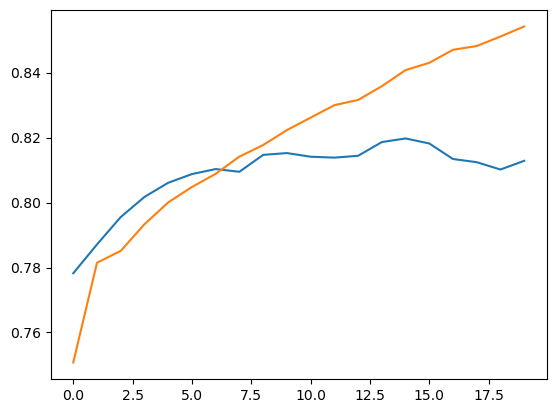

In [163]:

plt.plot(range(len(acc)), val_acc)
plt.plot(range(len(acc)), acc)

In [ ]:
%model.predict()

In [196]:
def nametonum(name: str):
    name=name.lower()
    name_encoded=encod_names(name)
    name_encoded=comp_list(name_encoded)
    return [name_encoded]

In [165]:
encod_names("junior")

[10, 21, 14, 9, 15, 18]

In [192]:
X_test[1, :].reshape(1, 50)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1, 19,  8,  1, 14,
         1,  5]])

In [193]:
test_pre=model.predict(X_test[1, :].reshape(1, 50))

1/1 [==============================] - 0s 58ms/step


In [167]:
test_pre

array([[0.15997536],
       [0.00576854],
       [0.43278244],
       ...,
       [0.9770272 ],
       [0.12420249],
       [0.20961541]], dtype=float32)

In [168]:
y_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [170]:
y_pred=np.apply_along_axis(lambda x: 1 if x>.4 else 0, 1, test_pre)

In [ ]:
sum(y_pred!=)

In [118]:
fin=lambda x: 1 if x>.5 else 0

In [ ]:
type(y)

In [177]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [179]:
accuracy_score(y_test, y_pred)

0.8117001828153565

In [124]:
roc_curve(y_test, test_pre)

(array([0.       , 0.       , 0.       , ..., 0.9798331, 0.9798331,
        1.       ]),
 array([0.00000000e+00, 3.57525921e-04, 1.68037183e-02, ...,
        9.99642474e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.9995412e+00, 9.9954116e-01, 9.9442786e-01, ..., 5.6628906e-03,
        5.6275055e-03, 1.3762284e-03], dtype=float32))

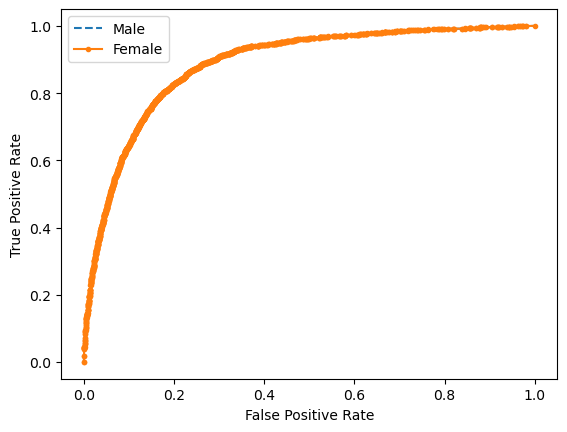

In [128]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, test_pre)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_pre)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Male')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Female')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [234]:
Junior=np.array(nametonum("aziz"))
p=model.predict(Junior)

1/1 [==============================] - 0s 41ms/step


In [238]:
p[0][0]

0.9013386

In [140]:
X_test

array([[ 0,  0,  0, ...,  3, 17,  0],
       [ 0,  0,  0, ..., 13,  0,  4],
       [ 0,  0,  0, ..., 19,  4, 13],
       ...,
       [ 0,  0,  0, ...,  7,  0, 21],
       [ 0,  0,  0, ..., 14, 12,  0],
       [ 0,  0,  0, ...,  4,  3, 24]])

In [236]:
tf.keras.models.load_model("predict_name.h5")

In [172]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 256)           6912      
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 401,409
Trainable params: 401,409
Non-trainable params: 0
_________________________________________________________________


In [1]:
import predict_sex as ps

C:\Users\7MAKSACOD PC\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ps.predict_name("Junior")

1/1 [==============================] - 1s 669ms/step


'Male'